In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
import seaborn as sns 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from bs4 import BeautifulSoup
import nltk
nltk.download("stopwords")   
from nltk.corpus import stopwords 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data = pd.read_csv("C:/Users/natas/OneDrive/Documents/UCD/Sem 3/TruthSeeker2023/Truth_Seeker_Model_Dataset.csv")

In [18]:
data

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree
...,...,...,...,...,...,...,...,...,...
134193,134193,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner",Joe Biden's family owned African slaves....\n\...,Mostly Agree,Agree
134194,134194,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner","Joe Bidens great, great grandfather was a slav...",Agree,Agree
134195,134195,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner","@ChevyChaseToGo ""Joe Bidens great-grandfather ...",Mostly Agree,Agree
134196,134196,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner",@JoeBiden Facts are Bidens VP Kamala Harris Gr...,NO MAJORITY,Agree


In [5]:
data.isnull().sum()

Unnamed: 0                 0
author                     0
statement                  0
target                     0
BinaryNumTarget            0
manual_keywords            0
tweet                      0
5_label_majority_answer    0
3_label_majority_answer    0
dtype: int64

True     68930
False    65268
Name: target, dtype: int64


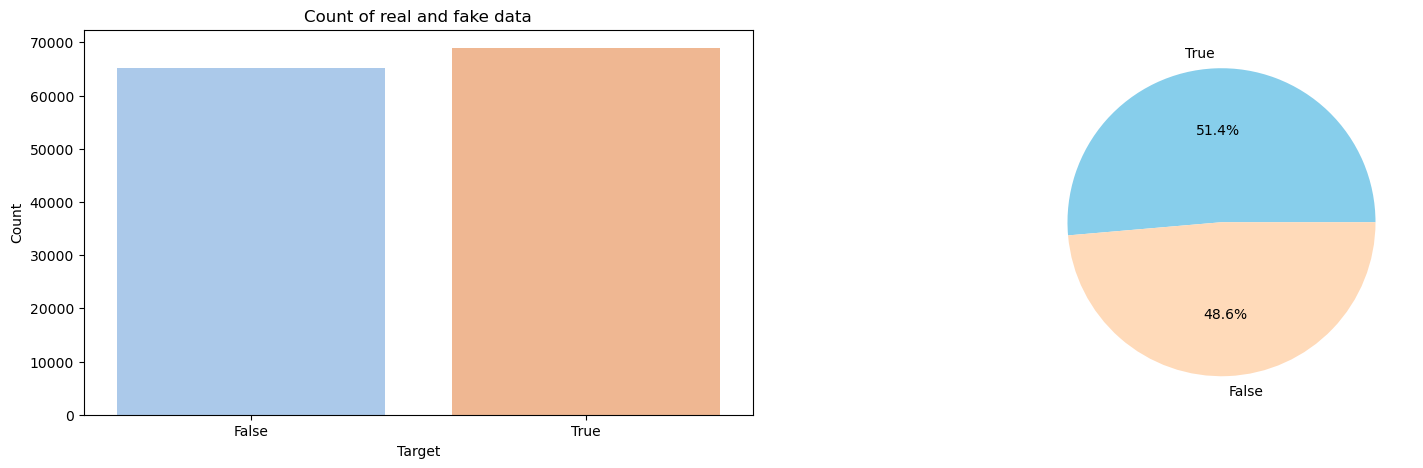

In [6]:
print(data["target"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.target,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

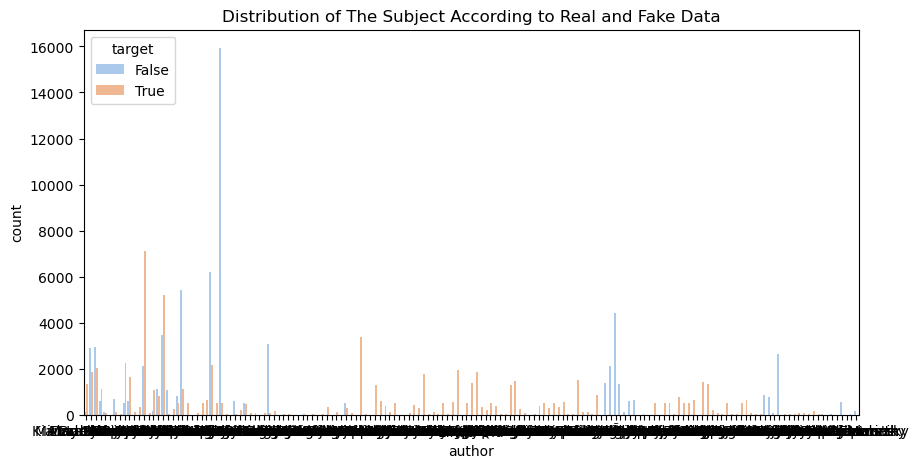

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="author",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [19]:
data['text'] = data['statement'] + data['tweet']
data.drop('statement', axis=1, inplace=True)

In [20]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.df.to_excel(r'Path of excel\File Name.xlsx'lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [21]:
data['text']=data['text'].apply(cleaning)

In [22]:
data.to_excel(r'cleaned_dataset.xlsx')